In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import scipy
import sklearn.model_selection
import statistics

In [142]:
# dzeta_1 = alpha*dzets_2^beta + N*{0,1}
data1 = [
    381, 421, 372, 418, 392, 427, 385, 358, 370,
    412, 411, 386, 395, 382, 376, 380, 383, 395,
    391, 430, 391, 377, 372, 406, 429, 429, 376,
    431, 405, 430, 382, 429, 413, 421, 395, 413,
    430, 373, 393, 375, 364, 449, 382, 375, 371,
    411, 427, 362, 388, 409, 400, 392, 378, 421,
    399, 396, 384, 373, 391, 340, 410, 428, 382,
    397, 389, 403, 440, 418, 412, 378, 398, 418,
    365, 399, 418, 400, 402, 405, 410, 423, 373,
    399, 389, 440, 429, 369, 394, 432, 390, 409,
    351, 384, 425, 407, 383, 415, 418, 456, 303,
    398, 420, 418, 404, 400, 383, 425, 422, 388,
    388, 421, 437, 418, 379, 383, 347, 428, 388,
    395, 429, 363, 410, 384, 416, 380, 433, 398,
]

data2 = [
    382, 418, 373, 413, 396, 429, 381, 353, 373,
    410, 406, 390, 392, 378, 374, 380, 381, 397, 
    391, 432, 388, 376, 373, 402, 432, 424, 379,
    430, 405, 430, 384, 432, 412, 417, 394, 412,
    429, 374, 394, 372, 367, 446, 381, 374, 375,
    408, 430, 364, 386, 412, 403, 395, 377, 425,
    396, 400, 381, 369, 394, 335, 410, 425, 380,
    394, 391, 406, 442, 416, 413, 376, 397, 417, 
    360,394,421,400,399,
    400,412,419,370,402,391,437,424,367,396,431,
    393,412,348,388,426,403,385,414,414,455,304,
    396,415,416,400,396,384,427,423,383,385,422,
    441,417,376,385,342,431,384,392,426,359,406,
    381,418,378,432,397
]
def prepare_data(data):
    sample = (np.array(list(map(float, data))) - min(data) + 1.e-6)/(max(data)-min(data))
    return sklearn.model_selection.train_test_split(sample, test_size=0.2, train_size=0.8)

sample_1_train, sample_1_test = prepare_data(data1)
sample_2_train, sample_2_test = prepare_data(data2)


In [131]:
print(f"Data1(mean={np.mean(sample_1_train)}, variance={np.var(sample_1_train)})")
print(f"Data2(mean={np.mean(sample_2_train)}, variance={np.var(sample_2_train)})")

Data1(mean=0.6288235359477125, variance=0.02187303601179034)
Data2(mean=0.6152317947019867, variance=0.025622121836761543)


Text(0.5, 1.0, 'Density')

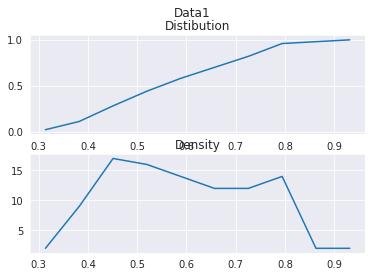

In [132]:
hist_1, bin_edges_1 = np.histogram(sample_1_train)
values_1 = np.cumsum(hist_1/np.sum(hist_1))
fig_1, axs_1 = plt.subplots(2)
fig_1.suptitle('Data1')
axs_1[0].plot(bin_edges_1[:-1], values_1)
axs_1[0].set_title("Distibution")
axs_1[1].plot(bin_edges_1[:-1], hist_1)
axs_1[1].set_title("Density")hist_1, bin_edges_1 = np.histogram(sample_1_train)
values_1 = np.cumsum(hist_1/np.sum(hist_1))
fig_1, axs_1 = plt.subplots(2)
fig_1.suptitle('Data1')
axs_1[0].plot(bin_edges_1[:-1], values_1)
axs_1[0].set_title("Distibution")
axs_1[1].plot(bin_edges_1[:-1], hist_1)
axs_1[1].set_title("Density")

Text(0.5, 1.0, 'Density')

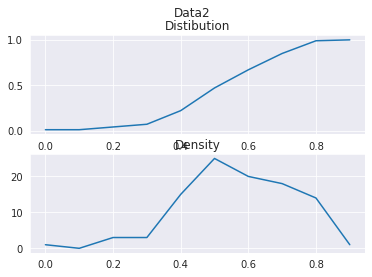

In [133]:
hist_2, bin_edges_2 = np.histogram(sample_2_train)
values_2 = np.cumsum(hist_2/np.sum(hist_2))
fig_2, axs_2 = plt.subplots(2)
fig_2.suptitle('Data2')
axs_2[0].plot(bin_edges_2[:-1], values_2)
axs_2[0].set_title("Density")
axs_2[1].plot(bin_edges_2[:-1], hist_2)
axs_2[1].set_title("Distibution")

In [134]:
def f(alpha, beta, x):
    return 1 - np.exp(alpha * x ** beta)

def minimum_square_method(coefs, x):
    alpha, beta = coefs
    x_new = np.arange(min(x), max(x), (max(x)-min(x)) / 100)
    y = list(map(lambda point: np.sum(x <= point) / len(x), x_new))
    return np.sum((f(alpha, beta, x_new) - y)**2)

def moment_method(sample_1, sample_2):
    beta = np.var(np.log(sample_1)) / (np.var(np.log(sample_2)))
    alpha = np.exp(- beta*np.mean(np.log(sample_2)) + np.mean(np.log(sample_1)))
    return alpha, beta

Оценка Альфа_1: -5.34124814093124
Оценка Бета_1: 4.408484252440114


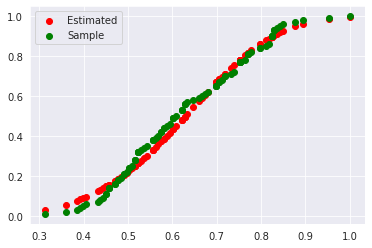

In [135]:
res_1 = scipy.optimize.minimize(minimum_square_method, [-0.1, 0.3], args = (sample_1_train, ))
alpha_1, beta_1 = res_1.x
print(f'Оценка Альфа_1: {alpha_1}')
print(f'Оценка Бета_1: {beta_1}')
plt.scatter(sample_1_train, f(alpha_1, beta_1, sample_1_train), color='r', label = 'Estimated')
plt.scatter(sample_1_train, list(map(lambda point: np.sum(sample_1_train <= point) / len(sample_1_train), sample_1_train)), color='g', label = 'Sample')
plt.legend()

Оценка Альфа_1: -6.052391433980855
Оценка Бета_1: 4.58376799368013


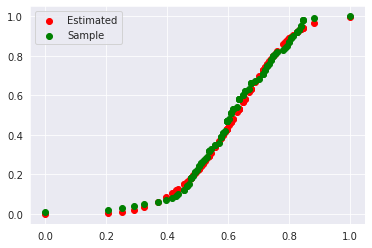

In [136]:
res_2 = scipy.optimize.minimize(minimum_square_method, [-0.1, 0.3], args = (sample_2_train, ))
alpha_2, beta_2 = res_2.x
print(f'Оценка Альфа_1: {alpha_2}')
print(f'Оценка Бета_1: {beta_2}')
plt.scatter(sample_2_train, f(alpha_2, beta_2, sample_2_train), color='r', label = 'Estimated')
plt.scatter(sample_2_train, list(map(lambda point: np.sum(sample_2_train <= point) / len(sample_2_train), sample_2_train)), color='g', label = 'Sample')
plt.legend()

In [137]:
alpha, beta = moment_method(sample_1_train, sample_2_train)
print(f"alpha_estimated:{alpha}, beta_estimated:{beta}")

alpha_estimated:0.6184419280592125, beta_estimated:0.01721412242029846


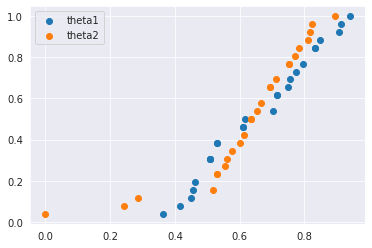

In [140]:
def distr(x, point):
    return np.sum(x <= point) / len(x)
plt.scatter(sample_2_test, list(map(lambda point: distr(alpha*sample_2_test**beta, point), alpha*sample_2_test**beta)), label = 'theta1')
plt.scatter(sample_1_test, list(map(lambda point: distr(sample_1_test, point), sample_1_test)), label = 'theta2')
plt.legend()

In [113]:
def calculate_Kolmogorov_statistic(sample_1, sample_2, alpha, beta):
    y_sample_1 = list(map(lambda point: distr(sample_1, point), alpha * sample_2 ** beta))
    y_sample_2 = list(map(lambda point: distr(alpha * sample_2 ** beta, point), alpha * sample_2 ** beta))
    max_dif = -1e10
    for y_1 in y_sample_1:
        for y_2 in y_sample_2:
            if np.abs(y_1 - y_2) > max_dif:
                max_dif = np.abs(y_1 - y_2)
    return max_dif * np.sqrt(len(sample_1))

In [114]:
kolmogorov_stat = calculate_Kolmogorov_statistic(sample_1_test, sample_2_test, alpha, beta)
alpha = 0.05   # 5%
K_alpha = np.sqrt(-1/2 * np.log((1 - alpha) / 2))
print(f"Статистика Колмогорова: {kolmogorov_stat}")
print(f"K_alpha: {K_alpha}")

Статистика Колмогорова: 5.0990195135927845
K_alpha: 0.6100985473460397


In [115]:
from scipy.stats import ks_2samp
ks_2samp(sample_1_test, alpha * sample_2_test ** beta)

KstestResult(statistic=1.0, pvalue=4.03292046399341e-15)